In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import sys
from tabulate import tabulate


In [3]:
data = pd.read_csv('SRET2019.csv')

In [ ]:
# Viewing the head of the data to understand the columns
print(data.head())

   Subject me not        Circumplex   Valence SERT.RESP Response  SERT.RT  \
0      164  Q   P   low affiliation  negative         q      yes     2668   
1      164  Q   P  high affiliation  positive         q      yes     2700   
2      164  Q   P   low affiliation  negative         q      yes     1476   
3      164  Q   P     low domonance  negative         p       no     2017   
4      164  Q   P  high affiliation  positive         q      yes     1124   

   SERT.RT_w_onset   taskword  Recall  Gender  LSAS  SPIN  BFNE  BDI  RSES  \
0            75120  אגואיסטית       0       2    50    22    27   10    39   
1           146150      אדיבה       0       2    50    22    27   10    39   
2           109911      אדישה       0       2    50    22    27   10    39   
3           153334      אטומה       0       2    50    22    27   10    39   
4           182990     אמפתית       0       2    50    22    27   10    39   

   FPES  STAI-S  STAI-T  
0    37      33      35  
1    37      33 

In [6]:
# Checking the shape of the data
print(data.shape)

(2736, 20)


In [ ]:
# Checking the number of participants
print(data['Subject'].nunique())	

57


In [ ]:
# Checking whether each participant has the same number of trials
print(data.groupby('Subject').size())

Subject
164     48
292     48
344     48
409     48
438     48
637     48
808     48
923     48
1109    48
1119    48
1418    48
1611    48
1688    48
1761    48
1800    48
1902    48
2007    48
2370    48
2463    48
2480    48
2582    48
2717    48
3219    48
3403    48
3515    48
3893    48
3904    48
4657    48
4755    48
4969    48
5071    48
5344    48
5625    48
5658    48
6016    48
6047    48
6184    48
6246    48
6453    48
6504    48
6588    48
7338    48
7351    48
7452    48
7542    48
7583    48
7796    48
7827    48
7888    48
7933    48
8197    48
8517    48
8788    48
8892    48
8995    48
9023    48
9350    48
dtype: int64


In [15]:
# Number of categories of words
n_categories = data[['Valence', 'Circumplex']].drop_duplicates().shape[0]
print(n_categories)
print(data[['Valence', 'Circumplex']].drop_duplicates())

4
    Valence        Circumplex
0  negative   low affiliation
1  positive  high affiliation
3  negative     low domonance
5  positive    high dominance


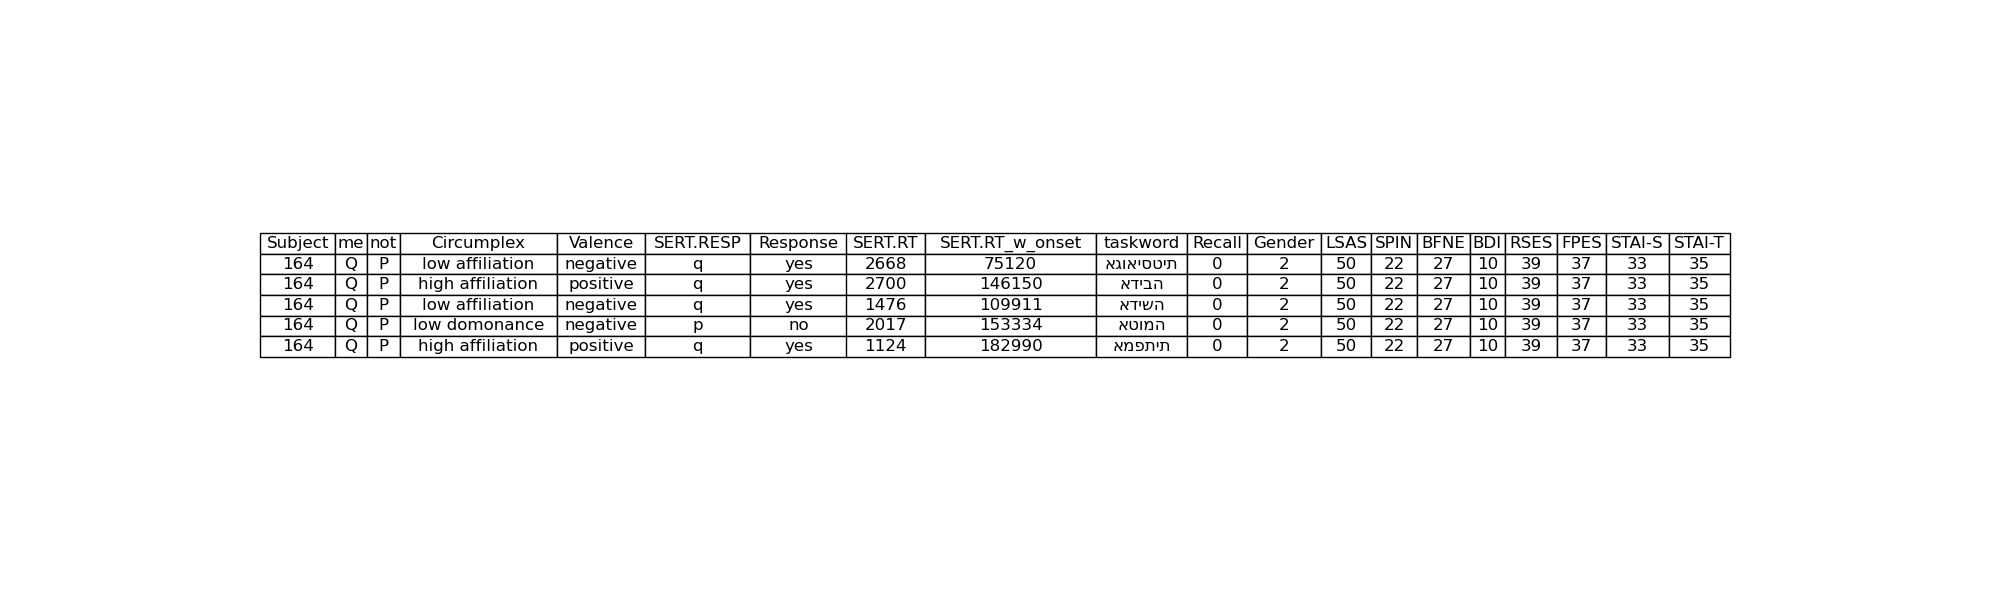

In [37]:
# Seeing what the data looks like (top 5 rows only)

selected = data.head(5)
fig, ax = plt.subplots(figsize=(20, 6))  # Make it wide enough initially
ax.axis('off')
table = ax.table(cellText=selected.values,colLabels=selected.columns,cellLoc='center',loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
col_widths = []
for col in selected.columns:
    max_len = max(
        selected[col].astype(str).apply(len).max(), 
        len(str(col))  
    )
    col_widths.append(max_len * 0.25) 
for i, width in enumerate(col_widths):
    table.auto_set_column_width(i)
    for key, cell in table.get_celld().items():
        if key[1] == i:
            cell.set_width(width)
plt.tight_layout()
plt.show()

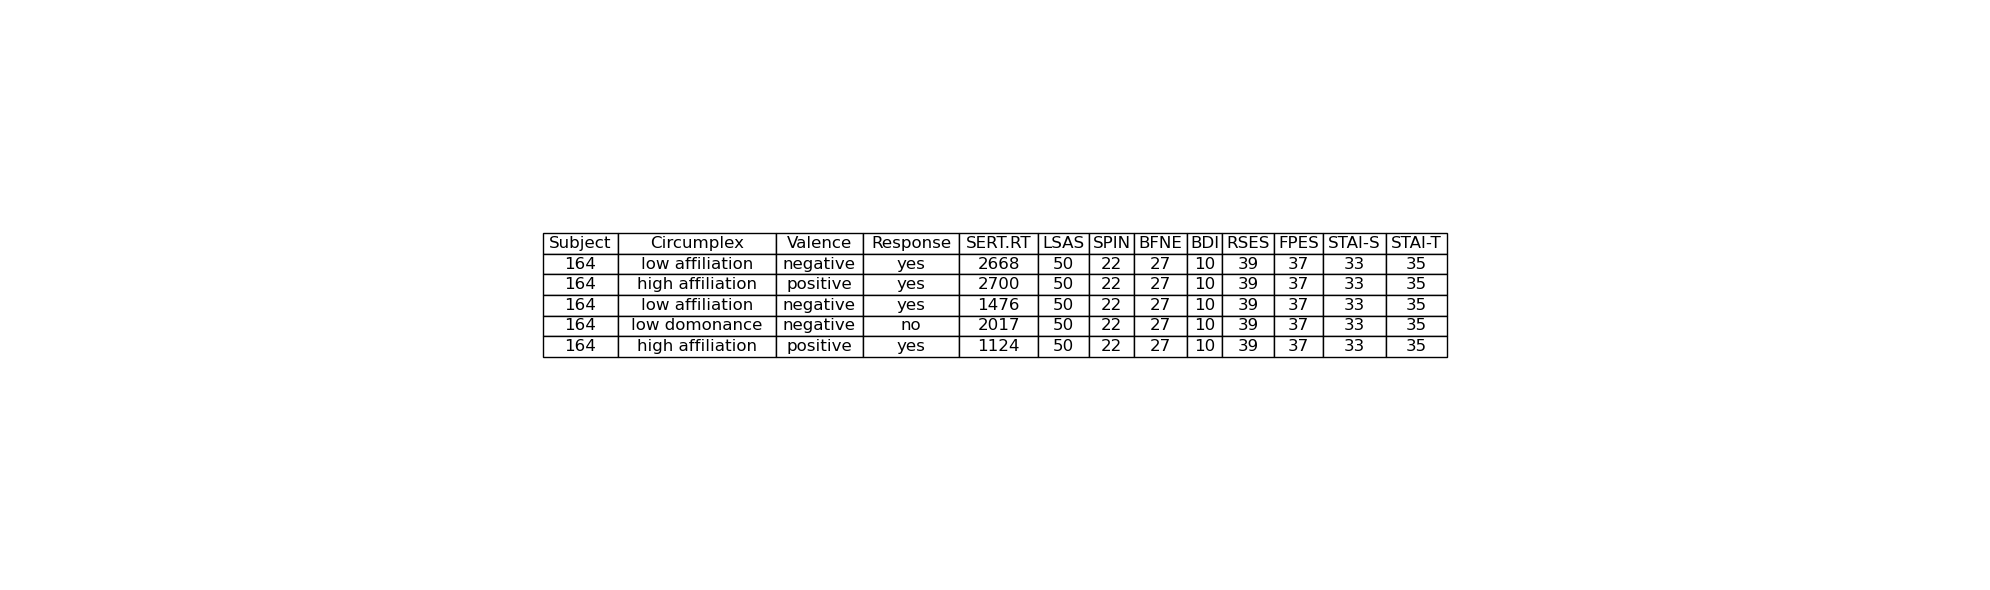

In [40]:
# Seeing only the relevant columns

selected = data[['Subject', 'Circumplex', 'Valence', 'Response', 'SERT.RT', 
                 'LSAS', 'SPIN', 'BFNE', 'BDI', 'RSES', 'FPES', 'STAI-S', 'STAI-T']].head(5)
fig, ax = plt.subplots(figsize=(20, 6))  # Make it wide enough initially
ax.axis('off')
table = ax.table(cellText=selected.values,colLabels=selected.columns,cellLoc='center',loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
col_widths = []
for col in selected.columns:
    max_len = max(
        selected[col].astype(str).apply(len).max(), 
        len(str(col))  
    )
    col_widths.append(max_len * 0.25) 
for i, width in enumerate(col_widths):
    table.auto_set_column_width(i)
    for key, cell in table.get_celld().items():
        if key[1] == i:
            cell.set_width(width)
plt.tight_layout()
plt.show()